# Estadística con Python

### GitHub repository: https://github.com/jorgemauricio/python_statistics

### Instructor: Jorge Mauricio

## Regresión lineal

Una empresa de comercio electrónico con sede en la Ciudad de Nueva York que vende ropa en línea, La compañía está tratando de decidir si enfoca sus esfuerzos en la experiencia de la aplicación móvil o en su sitio web.

Los clientes entran a la tienda, tienen sesiones / reuniones con un estilista personal, luego pueden ir a casa y ordenar en una aplicación móvil o sitio web para la ropa que desean.

La base de datos contienen la siguiente información
* email:         email del cliente
* direccion :    direccion del cliente
* imagen: imagen que se despliega en su perfil
* tiempo_sesion: tiempo de la sesión en la tienda
* tiempo_app:    tiempo que el usuario permanece en la app (minutos)
* tiempo_web:    tiempo que el usuario permanece en el sitio web (minutos)
* suscripcion:   tiempo de la suscripcion del cliente
* compras:       dinero que gasta el cliente al año

In [71]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
# leer csv
df = pd.read_csv("data/db_comercio.csv")

In [73]:
# checar la estructura del df
df.head()

,email,direccion,imagen,tiempo_sesion,tiempo_app,tiempo_web,membresia,compras
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [74]:
# consultar las estadísticas
df.describe()

,tiempo_sesion,tiempo_app,tiempo_web,membresia,compras
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [75]:
# información del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
email            500 non-null object
direccion        500 non-null object
imagen           500 non-null object
tiempo_sesion    500 non-null float64
tiempo_app       500 non-null float64
tiempo_web       500 non-null float64
membresia        500 non-null float64
compras          500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Análisis exploratorio de datos

In [76]:
# seleccionar paletas de colores de seaborn
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


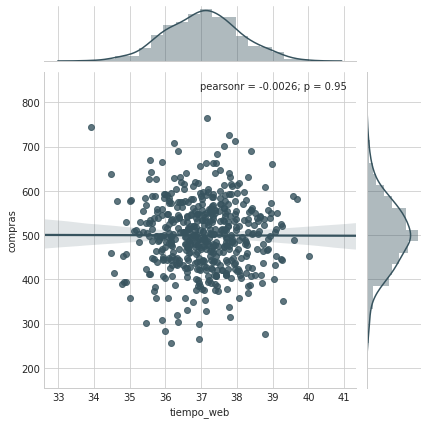

In [77]:
# vamos a evaluar el tiempo en el sitio web y las compras al año de los clientes
sns.jointplot(x='tiempo_web',y='compras',data=df, kind="reg")

/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


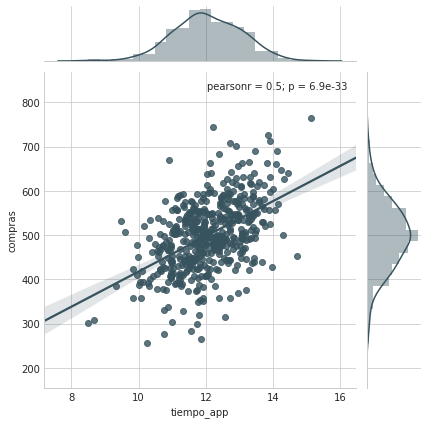

In [78]:
# ahora el tiempo en la aplicación móvil y las compras
sns.jointplot(x='tiempo_app',y='compras',data=df, kind="reg")

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


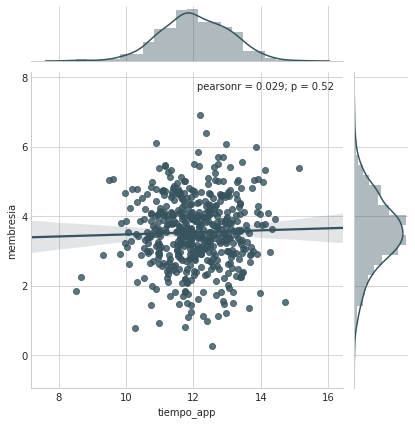

In [79]:
sns.jointplot(x='tiempo_app',y='membresia',kind='reg',data=df)

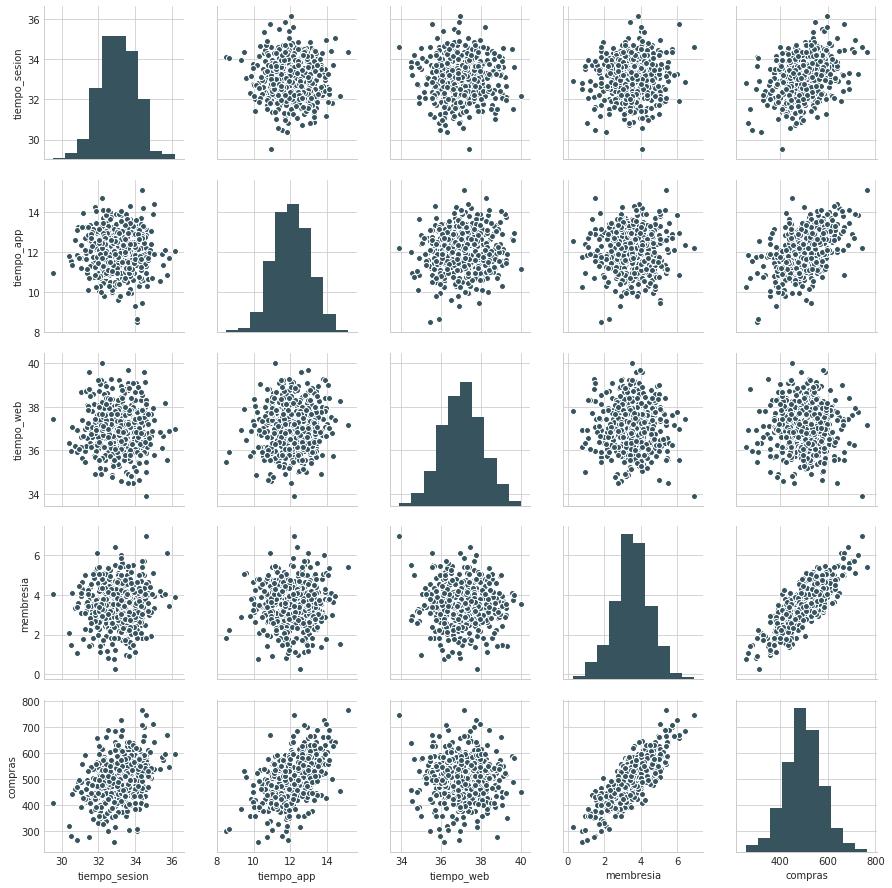

In [80]:
# analizar la relación lineal entre cada una de las variables
sns.pairplot(df)

**En base a la gráfica anterior cual es la variable que tiene un mayor relación con las compras?**

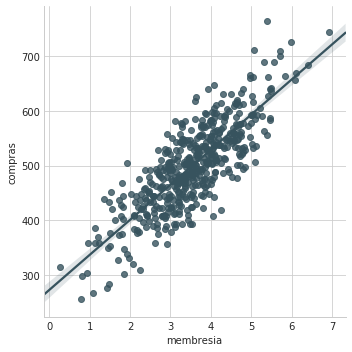

In [81]:
# vamos a crear una gráfica entre la membresía y las compras que realiza el cliente
sns.lmplot(x='membresia',y='compras',data=df)

## Training and Testing Data

Ya que realizamos una exploración de la información, es momento de dividir nuestra información en train y test, recuerda para construir el modelo de regresión solo vamos a utilizar variables numéricas

In [82]:
y = df['compras']

In [83]:
X = df[['tiempo_sesion', 'tiempo_app','tiempo_web', 'membresia']]

** Vamos usar el metodo model_selection.train_test_split de sklearn para dividir la información en train y text. La información para hacer la prueba va a ser del 30% test_size=0.3**

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Vamos a entrenar el modelo


**Import LinearRegression from sklearn.linear_model **

In [86]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [87]:
# crear la estancia del modelo
model = LinearRegression()

** Train/fit lm on the training data.**

In [88]:
# ajustar el modelo a la información de entrenamiento
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
# coeficientes del modelo
print('Coefficients: \n', model.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predecir con la información de prueba (Test)

In [90]:
predictions = model.predict( X_test)

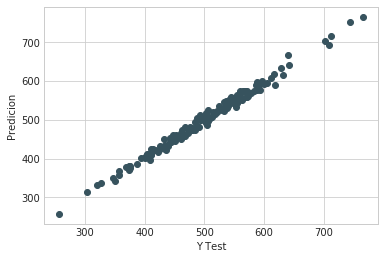

In [91]:
# crear una gráfica con los valores sinteticos vs reales
plt.scatter(y_test,predictions)
plt.xlabel('Y Test',)
plt.ylabel('Predicion')
plt.show()

## Evaluación del modelo

Vamos a evaluar el modelo mediante R^2

In [92]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


In [93]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,predictions)

In [94]:
# valor de R2
r_value ** 2

0.9891397301598615

## Residuales

Probablemente lograste ajustar un muy buen modelo, vamos a explorar los residuales para determinar que todo este correcto. 

**Gráfica un histograma con los residuales para determinar si su distribución es normal, puedes utilizar seaborn distplot o plt.hist()**

/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


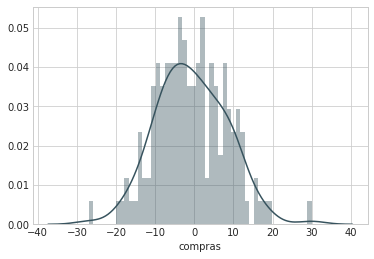

In [95]:
sns.distplot((y_test-predictions),bins=50);

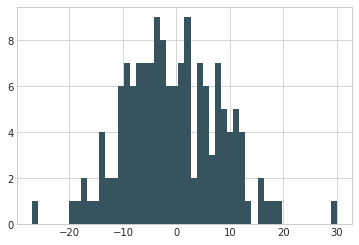

In [96]:
plt.hist((y_test-predictions),bins=50)
plt.show()

## Conclusión

Aun falta por resolver la pregunta original, se deben de enfocar los esfuerzos en la app móvil o en el portal web?, o posiblemente no importa? Acaso la membresía es lo que importa?

In [97]:
coeffecients = pd.DataFrame(model.coef_,X.columns)
coeffecients.columns = ['Coeficiente']
coeffecients

,Coeficiente
tiempo_sesion,25.981550
tiempo_app,38.590159
tiempo_web,0.190405
membresia,61.279097


** Como podemos interpretar los coeficientes **

El incremento en una unidad de:

* tiempo_sesion generar un aumento de: **25.98 en compras**
* tiempo_app generar un aumento de: **38.59 en compras**
* tiempo_web generar un aumento de: **0.19 en compras**
* membresia generar un aumento de: **61.27 en compras**


**La compañia debe de enfocar sus recursos en la aplicación móvil o en el portal web?**